# PCA through Singular Value Decomposition


In [ ]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0],[4, 3, 0]])

# Calculate the covariance matrix:*
R = np.cov(X, rowvar=True)

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi1 = u1.T @ X
Xi2 = u2.T @ X

# Calculate the approximation of the original from new basis
X_approx = u1[:, None] @ Xi1[None, :] + u2[:, None] @ Xi2[None, :]
 
# Check that you got the original
print(X_approx)

[[2. 1. 0.]
 [4. 3. 0.]]


# PCA on Iris data


In [2]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris

iris=load_iris()

print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


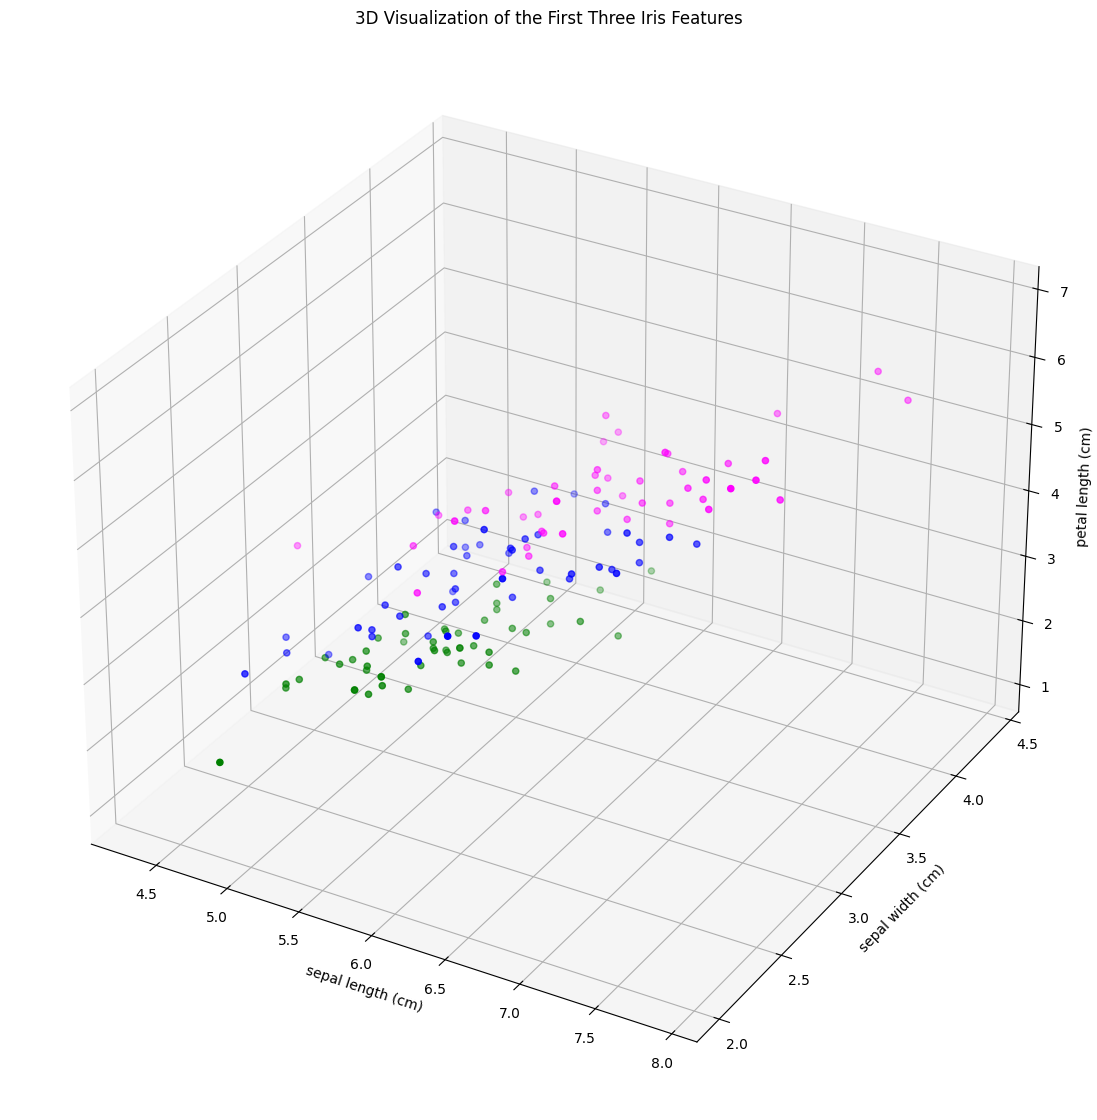

In [3]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 14))
axes1 = fig.add_subplot(111, projection='3d')

axes1.scatter3D(X[y==0,0], X[y==0,1], X[y==0,2], color='green')
axes1.scatter3D(X[y==1,0], X[y==1,1], X[y==1,2], color='blue')
axes1.scatter3D(X[y==2,0], X[y==2,1], X[y==2,2], color='magenta')

axes1.set_xlabel(iris.feature_names[0]) 
axes1.set_ylabel(iris.feature_names[1])
axes1.set_zlabel(iris.feature_names[2])
axes1.set_title("3D Visualization of the First Three Iris Features")

plt.show()

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


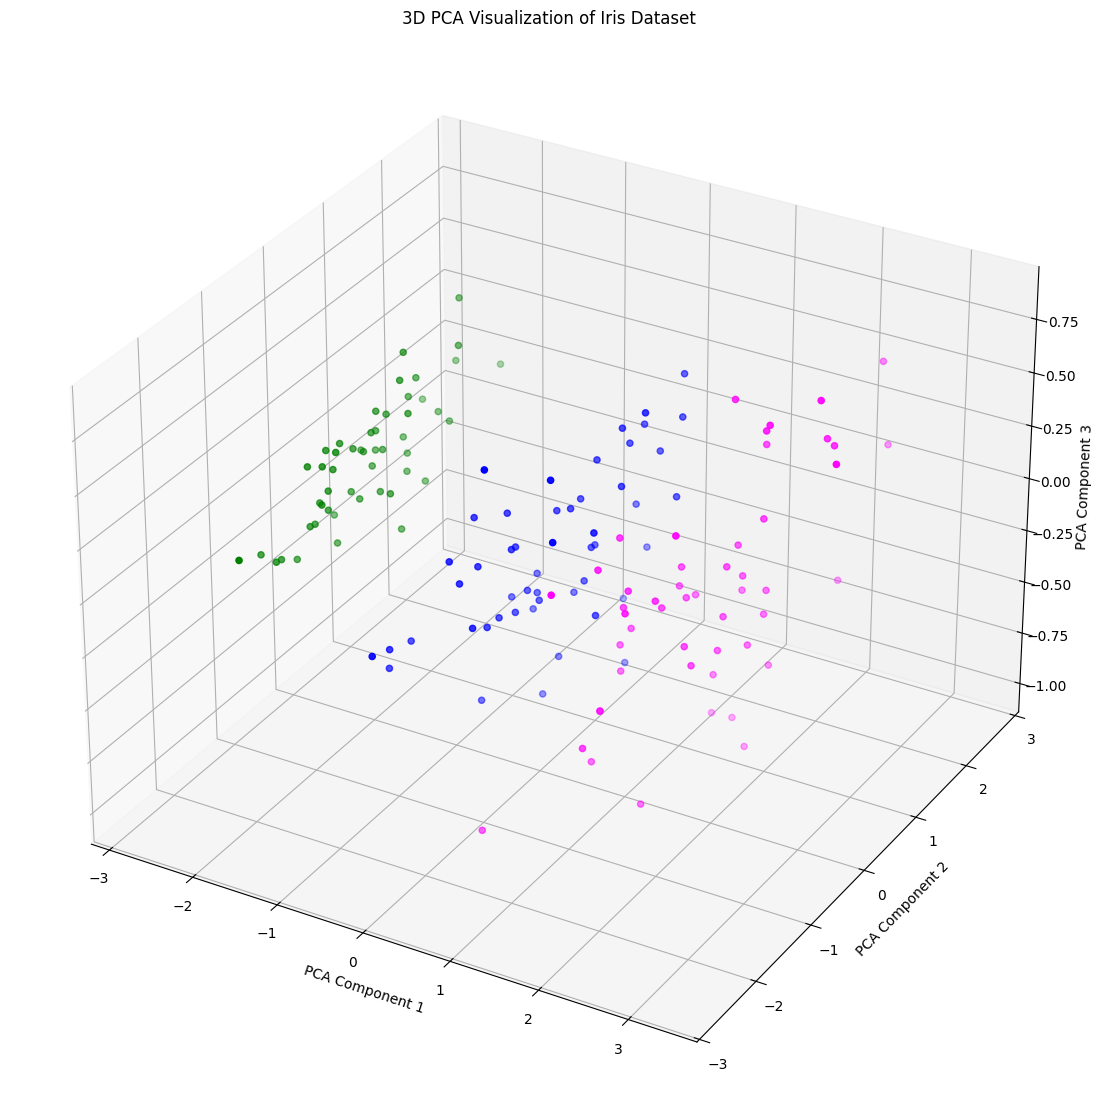

In [4]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data

pca = PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

# you can plot the transformed feature space in 3D:
fig = plt.figure(figsize=(14, 14))
axes2 = fig.add_subplot(111, projection='3d')

axes2.scatter3D(Xpca[y==0,0], Xpca[y==0,1], Xpca[y==0,2], color='green')
axes2.scatter3D(Xpca[y==1,0], Xpca[y==1,1], Xpca[y==1,2], color='blue')
axes2.scatter3D(Xpca[y==2,0], Xpca[y==2,1], Xpca[y==2,2], color='magenta')

axes2.set_xlabel("PCA Component 1")
axes2.set_ylabel("PCA Component 2")
axes2.set_zlabel("PCA Component 3")
axes2.set_title("3D PCA Visualization of Iris Dataset")

plt.show()


In [5]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [6]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

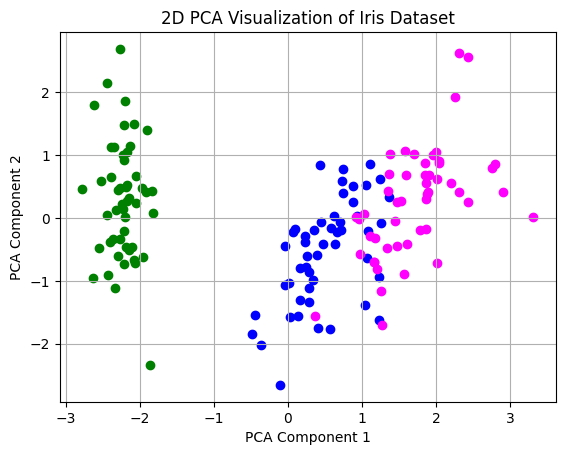

In [7]:
# Plot the principal components in 2D, mark different targets in color
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

# Scatter plot pour chaque classe
plt.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], color='green')
plt.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], color='blue')
plt.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], color='magenta')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Visualization of Iris Dataset")
plt.grid()

plt.show()

# KNN classifier


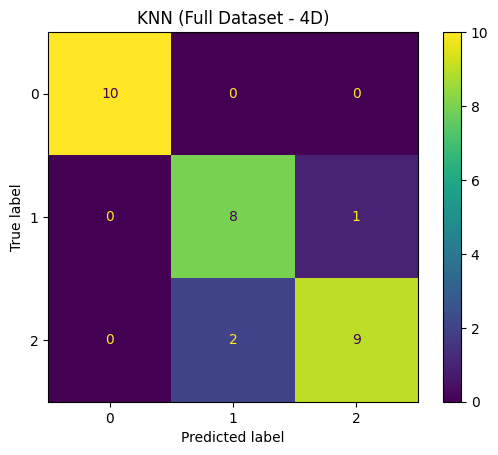

In [8]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
Ypred = knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("KNN (Full Dataset - 4D)")
plt.show()

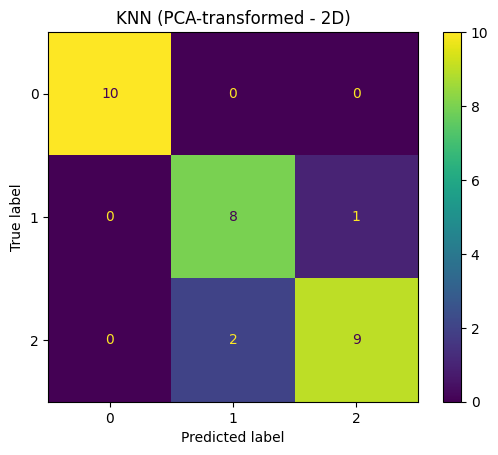

In [9]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset
pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

Xpca_train, Xpca_test, y_pca_train, y_pca_test = train_test_split(Xpca, y, test_size=0.2, random_state=8)

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(Xpca_train, y_pca_train)

Ypred_pca = knn_pca.predict(Xpca_test)

cm_pca = confusion_matrix(y_pca_test, Ypred_pca)

disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp_pca.plot()
plt.title("KNN (PCA-transformed - 2D)")
plt.show()

The results are almost identical to those obtained with the full dataset.


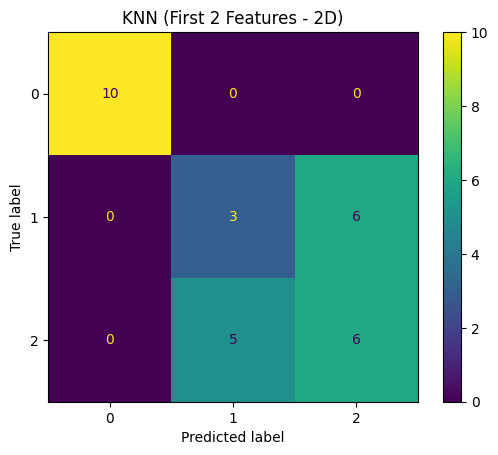

In [10]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=8)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)
Ypred = knn1.predict(X_test)
cm = confusion_matrix(y_test, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("KNN (First 2 Features - 2D)")
plt.show()

### In conclusion:

PCA allows us to reduce the number of dimensions by intelligently eliminating less important features while preserving most of the relevant information. This often leads to similar model performance with fewer computations. However, randomly removing features without considering their importance can significantly reduce performance, as it may discard crucial discriminative information.
